# Chapter 8 - Stereovision, Trinagulation, Feature Correspondance, Disparity Map

In this acticle we introduce the topic of stereo vision which is the application of mutiple camera views to get information about the depth of the view. Using stereo Visione one can derive the world locaton of a point from its images in different camera views. 


## Multiple View Geometry

There are different variations of multiple view geometry as this term encompasses all aplication working with multiple view of the save object from different angles. This can be from stereo cameras which have multiple carmeras in the same devices or different views from different devices. So let un defined two different terms which are important to keep in mind for the rest of the article.

**3D reconstruction from multiple views**: For this application we assume that the camera intrinsics K are known. Also We assume that we knoe the Ratation and the Transaltion between different views. This can be by using some IMUs or other mechanisms. The Goal is to reconstruct the 3D structure of the objecft drim many different images.

**Structure From Motion (SFM)**: In this application we do not know any intrinsics K or any Translation or Rotation. Therefore the goal is to recover the intrinsics as well as the camera pose together ith the 3D structure of the scene.

In the case of exact 2 views we call the first case **Depth from stereo** and the second one **2-view Structure from Motion**.

### Depth from Stereo

For a single camera only back-project the ray on which the image point lies but we can not determine at which depth the actual object is located. An illustraiotn for that you can see in the left side in Figure 1. When using two cameras as we do in stereo cameras we have such a ray-back-projection originating from different locations in the world. As a result we can just see where the rays from the left camera intersect with the ones from the right camera to know at which depth the object lies.

![Perspective and Stereo](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/1_projection_and_stereo.png)
*Figure 1: Perspective and Stereo [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

Our brain also work like this and thats the reasons why most amymals and humans have two eyes. This is so that they are able to estimate the depth of the secene they are seeing. Our brain mixes the two images that we are seeing, one from each eye, into one single image. This is similar to the processing our brain makes to turn the observed images as the eyes observe the world in an upside-dwn view.

You can experience the effect of stereo vision simpli by holting up one finger infornt of your eyes and then closing the left eye only, and short after that the right weye only. You will observe that the fingers seems to jumping from left to right.
This observed horizontal displacement is called **disparity**.


### Disparity

The displacement between two images allows us to percept depth. The displacement in the image is always along the same axis as the displacement of the perceptors. Usually tthe perceptors are displaced horizonally as for the example with the eyes of animals of also most standard stereo cameras. One application where this is used are the anaglyphs. These are the images with red and blue thint which appear with depth when you look trough soe glasses where infron of the eye there is a blue filter and infront of the othere there is a red filter.

Another application is the stereogram where you can see certain images in depth when focusing behind the actual image. In the example below you have to focus about 10cm behind the image plane to then hopefully see the plant. For this effect the stereo vision is needed. You can try it out by clonsing one eye when you have been able to focus correctly to see tha plant. Once you close one eye you will instatly lose the vision of the plant.

![Stereogram](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/2_stereogram.png)
*Figure 2: Stereogram [source](http://Image from magiceye.com)*


### Stereo Vision

The basic principle of stereo vision is to recosntruct the 3D position of a point by intersecting its rays thouth its images in different views. For this we need the position of the camera so that we know the absolute world position of the ray. also we need to knwo which points of the different view images to correspond (point correspondence)
In general the different the cameras image planes can be orientated independently from each other. However the problem becomes easier when the imageplanes are aligned and also when the same camera intrinsics can be applied to all images. Meaning the cameras are identical.

![Stereo simple and general case](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/3_stereo_cases.png)
*Figure 3: Stereo simple and general case [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*


In reality the case pictured in Figure 4 barely happens where both camera planes are prefectly aligned. In Practice two identical cameras do not exist and aligning then perfectly is very hard. Also because external infulences like pressure and temparature can deform the materials. Therefore to use stereo camera we need the extrinsic parameters like rotation and translation as well as the intrinsic parameters of each camera which are the focal length, optical center and radial disortion. These intrinsics we can get through the calibration methods.


\begin{align*}
\dfrac{f}{Z_P} &= \dfrac{u_l}{X_p} \\
\dfrac{f}{Z_P} &= \dfrac{-u_r}{b-X_p}
\end{align*}

From this we can derive:

\begin{align*}
Z_P = \dfrac{bf}{u_l-u_r} \\
\end{align*}

$u_l-u_r$ is what we have previously introduced as **disparity**, the displacement of the same object on the different images in pixel coordinates.

![Stereo Vision simple](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/4_stereo_vision_simple.png)
*Figure 4: Stereo Vision simple [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*


In figure 4 we want to find an expression for the distance from the image to the object which is denoted as $Z_P$. We can see that both cameras $C_l$ and $C_r$ have the same focal length $f$. Also they are prefectly allinged with a horizontal displacement $b$, which we call **baseline**. From the similarity of the triangles in green and yellow we know that the relation betwen the length of the red lines must be the same as the relation of the lengths of the blue lines. Therefore we know:

For practical applications some questions may arise. For example what is optimal baseline distance? Because if the it is too large, then the minimum measurable depth increases and close object can not be searched for. If the baseline is too small then there is a large depth error.

![Large and Small Baseline](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/5_large_and_small_baseline.png)
*Figure 5: Large and Small Baseline [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*



### Correspondence Problem

Given a point of the image of the left camera $p_l$, how can we find that point easily and fast on the right image ($p_r$)?
One approach would be the take a patch around $p_l$ and scan the right iamge and compare all patches using similarity measure again the patch of $p_l$. We can use similarity measures like (Z)NCC, (Z)SSD, (Z)SAD or Census Transform. However scanning the whole image is very slow since we try to compare an extensive amount of patches. However we can constrain the set of possible patches to speed up the process. The solution to this is called **epipolar line**. This line describes the projection of the rays of the camera in image one and the point onto the second camera image. On other words: From the image location of a point and the camera location on the single camera case we know that the point in 3D has to lie on the ray from the camera center through the image point. However we do not know at with distance (depth). We can now project this ray onto the camera plane of the second camera with results in a line, the epipolar line. We can also draw a line connecting both camera center location. The points where this line intersects the image plane is called **epipoles**. Since in the stereo camera case we have two cameras and therefore one line and two image planes, we have two epipoles.

![Epipolar Line](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/11_epipolar_line.png)
*Figure 11: Epipolar Line [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

The plane that is span by the the two camera point and the 3D point is called epipolar plane. We can also define the epipolar line as the intersection of the epipolar plan with the camera plane. We call the constraint that the position of corresponding points have to lie in their epipolar line the **epipolar constraint**. Using this contraint we can reduce the region to search for a corresonding point to a 1D search on the epipolar line.

![Epipolar Plane](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/12_epipolar_plane.png)
*Figure 12: Epipolar Plane [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

![Examples](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/13_epipolar_examples.png)
*Figure 13: Examples [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

However as previouly already mentioned. In practice the left and right camera are not perfectly alligned and also the intrinsicts differt. Therefore they might be distordet differently.

### Stereo Rectifications

Due to missalignment and different intrinsinct the images of both stereo cameras have to be warped into new images for which the epipolar lines are perfectly aligned. These new images are called **recitified** images. The whole process is called **rectification** and warps the image planes onto coplanar parallel planes. As a result the epipolar lines are horizonal. this means the scan lines for the correspondance problem are aligned. Since the focal planes become parallel the epipoles lie in infinity.

![Stereo Rectifications](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/14_stereo_rectification.png)
*Figure 14: Stereo Rectifications [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

To describe the retification process mathematicially we use the already known perspective equation from chapter 2. However we use $R$ and $T$ as the transformation from the Camera framw to the world frame. And we call the Translation $C$ instead of $T$ because it represents the world coordinates in terms of the camera center. ***camera position in worldframe***


![Projection Equation](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/15_projection_equation.png)
![Projection Equation Left and Right](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/15_projection_equation_left_and_right.png)
*Figure 15: Projection Equation [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

Using the rectification process we want to waro the left and right camera so that the images are coplanar (same $\hat{R}$) and the intrinsics are the same (same $\hat{K}$). Therefore we want $K_LR_L^{-1} = \hat{K}\hat{R}^{-1} = K_RR_R^{-1}$

![New Cameras](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/16_new_cameras.png)
*Figure 16: New Cameras [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

Using a homography we can express this using the original image coodinates ($u_L$, $v_L$, $u_R$, $v_R$).

![Applying Homography](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/17_homography.png)
*Figure 17: Applying Homography [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

So now we can pose the question how do we get the $\hat{K}$ and $\hat{R}$. Some good choices are:

\begin{align*}
\hat{K} &= \dfrac{K_L + K_R}{2}\\
\hat{R} &= \begin{bmatrix} \hat{r_1} & \hat{r_2} & \hat{r_3} \end{bmatrix}\\
\end{align*}

where,

\begin{align*}
\hat{r_1} &= \dfrac{C_2 - C_1}{\lVert C_2 - C_1 \rVert}\\
\hat{r_2} &= {r_L}_3 \times \hat{r_1}\\
\hat{r_3} &= \hat{r_1} \times \hat{r_2}\\
\end{align*}

where ${r_L}_3$ is the third column of the rotation matrix of the left camera ($R_L$)

![Example](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/18_rectification_example.png)
*Figure 18: Example [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*



### Correspondence Matching

Now that we have recified the images it becomes much easier to match the correspondence since we only have to search of the epipolar line. Now the scan lines are matched in vertical position with the left image. We can efen further increase the speed of matching correspondence by taking into account that the first image if from the left camera and the second from the right camera. Therefore we know that a correspondence of a point in the left image has to closer the the left edge on the right image as it was on th eleft one. Therefore we only have to search on the scan line from the left up to the same vertical position as in the left image.

The matching itself uses a similarity measure and where this measure is highest there is also the matching corresponding point.
Well known similarity measures are:
- (Z)NCC (Normalized Cross Correlation)
- (Z)SSD (Sum of Squared Differences) aka. Blockmatching
- (Z)SAD (Sum of Absolute Differences)
- Census Transform

![Correspondence Matching](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/19_correspondence_matching.png)
*Figure 19: Correspondence Matching [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

Additionally we can get some more information from this. From the horizonal displacement distance between the image point in the left and the one in the right image, the so called **disparity** we can get more insight into the depth of the scene. We can construct disparity maps which show regions of point with the same disparity which also means that these point have a equal depth in the scene. The smaller the disparity of the point in the left image the furthe back it is in the scene. 

This methods work well as long as the patch includes enought texture. If there is not enough texture then the difference in similarity will not differ to much between different patches and no single point of matchin can be identified. However the is a solution for this. Whenever there is not enought textrue we can just enlarger the patchsize until there is texture. There are however some sideeffects dependent on the patchsize:

Smaller patchsize:
- more details (+)
- more noise (-)

Larger patches:
- smoother disparity maps (+)
- less detail (-)

#### Disparity maps

Disparity maps show points which similar horizonal dislocation between left and right image in the same color. Point with same dispariy are located in 3D at the same distance from the camera. This distance (depth) can also be caculated:

\begin{align*}
Z_P &= \dfrac{bf}{u_l-u_r}\\
&= \dfrac{baseline * focal lenth}{disparity}\\
\end{align*}

This formula we have see already previously earlier in this chapter. Remember, the baseline is the horizonal displacement of the camera centers.

There are some difficulties that have to be taken into account when solving the correspondence problem. It can habben that multiple point have a hight similarity. In such cases it is important to remember that only one match existst in the right image for a point in the left image (Uniqueness). Also points on the same surface will be in same order in both views and the disparity between points on the same surface change smoothly.

The methods of using epipolar lines can also help alot when woring with sparse stereo correspondencees where the are onyl a few detected features and the possibilites of two points matching can be constraint by the epipolar line.

### Trinagulation

Triangulation describes the process of finding the 3D position of a point given known camera location and rotation and a set of corresponding image location of that point. The goal is to instersect multiple viual rays corresponding to the image and camera center locations. The point where these rays intersect is then the 3D location of the point.

#### Linear Approximation

![Linear Approximation](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/6_linear_approximation.png)
*Figure 6: Linear Approximation [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

Recalling some knowledge about cross (vector) product and dot product:
- the dot product of twh vectors which are perpendicular to each others is 0
- the cross product of two vectors that are parallel is 0

The cross product can also be expressed as a **skew-symmetric matrix**.

![Skew Symmetric Matrix](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/7_skew_symmetric_matrix.png)
*Figure 7: Skew-Symmetric Matrix [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

We can express the image location in terms of world-coordinates as a dot product. We express the 3D position of the point in terms of the world coordinates with origin in the camera position of the left camera. Thefore cross product of $p_i$ and $M_i$ describes the normal vector onto the epipolar plane. As a result the position vector for the 3D position of the point is perpendicular to that normal vector of the epipolar plane. As a result we can set the ebelow equations to 0.

![triangulation equation part1](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/8_triangulation_equation_1.png)
![triangulation equation part2](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/8_triangulation_equation_2.png)
*Figure 8: Triangulation [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

In the general case it might happen that the rays of images do not intersect. In such a case the 3D position of the point is determined as the mid point of the shortest segment connecting the two rays.

![Shortest Segment Midpoint](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/9_shortest_segment.png)
*Figure 9: Shortest Segment Midpoint [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

#### Non-Linear Approximation

A more complex but more accurate description of the 3D position of the point is using the non-linear approximation.
Here we want to find the point $P$ such that is minimizes the **Sum of Squared Reprojection Errors (SSRE)**.

\begin{align*}
SSRE = {\lVert p_1- \pi_1(P) \rVert }^2 + {\lVert p_2- \pi_2(P) \rVert}^2
\end{align*}

where $\pi_i(P)$ is the projection of P onto the i-th camera plane and ${\lVert p_i- \pi_i(P) \rVert }^2$ is the **Reprojection Error**.

![Reprojection Error](https://github.com/joelbarmettlerUZH/PyVisualOdometry/raw/master/img/chapter_8/10_reprojection_error.png)
*Figure 10: Reprojection Error [source](http://rpg.ifi.uzh.ch/docs/teaching/2019/07_multiple_view_geometry_1.pdf)*

### Summary

- Disparity is the horizonal displacement of the image point in the right image compared to the image point of the same 3D point in the left image.
- Triangulation in the linear approximation thes the midpoint of the shortes segment connecting the projected rays. This means it accounts for both images (rays) the same weight toward the error.
- For the non-linear approximation the 3D point does not have to be in the middle of both rays, it is rather determined such that the overall error is smallest. The error measure in that case is the distance between the actual image point and the reprojects 3D point onto the image plane. For to cameras the error is the aggregated distances from both iamges.
- for a steareo camera it is important to choose the right baseline. if it is too large then the minimum measurable depth increases and close object can not be searched for. If it is too small the the depth error is large. ($Z_P = \dfrac{b*f}{disparity}$)
- epipoles are the intersection of the line connecting both cameracenters with the image planes
- epipolar lines are projection of the ray of one image onto the iimage plane of the other camera
- epipolar plane is the plan span by the 3D point and the camera centers. When intersectin the epipolar plane with the image planes the intersection is equal to the epipolar line
- retification is the process of correcting the misalignment of the cameras. The images are transformed so the they show the situation how it would be when the image planes would be parallel to the baseline. 

# Code Example - Stereo Dense Reconstruction

IN this example we are going to reconstruct the three dimensional scene by applying dense epipolar matching. We are using the public KITTI dataset as input.

#### Part 1 - Calculate Pixel Disparity

Inthe first part we are going to determine the pixel disparity vetween the two images from the stereo camere, so the left and the right image. using SSD atching on a disparity range.

[[0.36862746 0.29803923 0.2509804  ... 1.         1.         1.        ]
 [0.3254902  0.27450982 0.24705882 ... 1.         1.         1.        ]
 [0.29803923 0.26666668 0.25490198 ... 1.         1.         1.        ]
 ...
 [0.5411765  0.54901963 0.54901963 ... 0.36862746 0.3647059  0.36862746]
 [0.5294118  0.5137255  0.5058824  ... 0.38039216 0.38039216 0.3882353 ]
 [0.5137255  0.49411765 0.4745098  ... 0.4        0.4        0.39607844]]


D:\Anaconda5\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
D:\Anaconda5\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


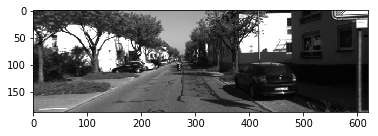

620 188


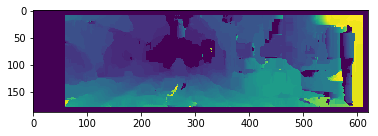

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image  
from scipy.spatial.distance import cdist, sqeuclidean
from scipy.misc import imresize
from multiprocessing import Pool, freeze_support
from itertools import repeat
from functools import partial
import inspect


#left_img = Image.open("img/chapter_8/data/left/000000.png")  
#right_img = Image.open("img/chapter_8/data/left/000000.png") 
left_img = mpimg.imread('img/chapter_8/data/left/000000.png')
print(left_img)
right_img = mpimg.imread('img/chapter_8/data/right/000000.png')

left_img = np.array(imresize(left_img, float(0.5), interp='bicubic'), dtype=np.float32)
right_img = np.array(imresize(right_img, float(0.5), interp='bicubic'), dtype=np.float32)

#left_img = left_img.resize((int(width/2), int(height/2)))
#right_img = right_img.resize((int(width/2), int(height/2)))
 
plt.imshow(left_img, cmap='gray')
plt.show()


K = np.loadtxt('img/chapter_8/data/K.txt')
K[1:2, :] = K[1:2, :] / 2;

poses = np.loadtxt('img/chapter_8/data/poses.txt')

# Given by the KITTI dataset:
baseline = 0.54

# pretuned parameters
patch_radius = 9;
min_disparity = 5;
max_disparity = 50;

def inner_loop(h, patch_radius, left_img, right_img, height, width, min_disparity, max_disparity):
    arr = []
    for w in range(patch_radius+max_disparity,width-patch_radius-1):
        # MANUAL disparity
        """
        distance = float("inf")
        disparity = 0
        for x in range(w,max(patch_radius+1,w-max_disparity),-1):
            disp = w-x;
            patch_left = left_img[h - patch_radius : h + patch_radius, w - patch_radius : w + patch_radius].reshape(-1);
            patch_right = right_img[h - patch_radius : h + patch_radius, x - patch_radius : x + patch_radius].reshape(-1);
            d = cdist([patch_left], [patch_right], 'sqeuclidean');
            
            if (d < distance):
                disparity = disp;
                distance = d;
            # set disparity outside of disparity range to 0  
        """
        # Vectorized
        
        patch_left = left_img[h - patch_radius : h + patch_radius, w - patch_radius : w + patch_radius].reshape(-1);
        vec_r = []
        for x in range(w,max(patch_radius+1,w-max_disparity),-1):
            # get patched and make them 1-d
            patch_right = right_img[h - patch_radius : h + patch_radius, x - patch_radius : x + patch_radius].reshape(-1);
            vec_r.append(patch_right)
        #print(vec_r.shape)

        pdist = cdist([patch_left], vec_r, 'sqeuclidean')
        arg_min = np.argmin(pdist)
        print("arg_min", arg_min)

        disparity = arg_min
        
        if (disparity < min_disparity or disparity > max_disparity):
            disparity = 0;
        print(disparity)
        arr.append([h, w, disparity])
    return arr
    

def get_disparity(left_img, right_img, patch_radius, min_disparity, max_disparity):
    height, width = left_img.shape
    print(width, height)
    disparity_image = np.zeros((height, width))
    
    with open('img/chapter_8/data/tmp_func.py', 'w') as file:
        file.write("import numpy as np\n")
        file.write("from scipy.spatial.distance import cdist\n")
        file.write(inspect.getsource(inner_loop).replace(inner_loop.__name__, "task"))

    from img.chapter_8.data.tmp_func import task
    func = partial(task, patch_radius=patch_radius, left_img=left_img, right_img=right_img, height=height, width=width, min_disparity=min_disparity, max_disparity=max_disparity)
    #Iterative
    """
    for h in range(patch_radius,height-patch_radius-1):
        print(h)
        res_array = inner_loop(h,patch_radius, left_img, right_img, height, width, min_disparity, max_disparity)
        for h,w,res in res_array:
            disparity_image[h,w]=res
    """
    #Parallelized
    p=Pool(8)
    res_array = p.map(func, range(patch_radius,height-patch_radius-1))
    p.close()
    for inner in res_array:
        for h,w,res in inner:  
            disparity_image[h,w]=res

    plt.imshow(disparity_image)
    plt.show()
    
freeze_support() 
get_disparity(left_img, right_img, patch_radius, min_disparity, max_disparity)

